In [1]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
import keras

In [4]:
# !git clone https://github.com/deepinsight/insightface.git

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Clone insightface
!git clone https://github.com/deepinsight/insightface.git
!pip install -r insightface/requirements.txt
!pip install imutils opencv-python

fatal: destination path 'insightface' already exists and is not an empty directory.


In [11]:
dataset = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train"
embeddings = "/content/embeddings.pickle"
image_size = "112,112"

In [ ]:
model

In [7]:
import os

In [8]:
os.path.exists(dataset)

True

In [12]:
os.listdir("/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/insightface/models/model-y1-test2")

['model-symbol.json', 'model-0000.params', 'log']

In [13]:
os.listdir("/content/drive/MyDrive/coconut/buffalo_l")

['det_10g.onnx', 'genderage.onnx', '2d106det.onnx', '1k3d68.onnx']

In [16]:
pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.9 MB/s eta 0:00:00


In [21]:
import onnxruntime as ort
import matplotlib.pyplot as plt

In [18]:
# Load the ONNX face embedding model
embedding_model_path = '/content/drive/MyDrive/coconut/buffalo_l/w600k_r50.onnx'  # Update with the correct model name
session = ort.InferenceSession(embedding_model_path)

In [19]:
img = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train/Arya Stark/10.jpg"

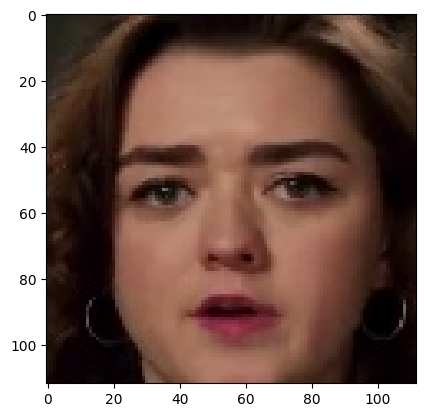

In [22]:
plt.imshow(plt.imread(img))

In [23]:
inputs = session.get_inputs()

In [25]:
outputs = session.run(
    None,
    {inputs[0].name:img}
)

RuntimeError: Input must be a list of dictionaries or a single numpy array for input 'input.1'.

<hr>

## Download model
<a href="https://github.com/deepinsight/insightface/releases">https://github.com/deepinsight/insightface/releases</a>

In [26]:
import cv2
import numpy as np
import onnxruntime as ort

In [27]:
embedding_model_path = '/content/drive/MyDrive/coconut/buffalo_l/w600k_r50.onnx'
session = ort.InferenceSession(embedding_model_path)

In [28]:
img_path = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train/Arya Stark/10.jpg"
img = cv2.imread(img_path)

In [29]:
img = cv2.resize(img,
                 (112,112))

array([[[29, 34, 33],
        [28, 33, 32],
        [27, 33, 32],
        ...,
        [ 5, 11, 16],
        [ 9, 18, 22],
        [10, 19, 23]],

       [[29, 34, 33],
        [28, 34, 33],
        [27, 33, 32],
        ...,
        [ 9, 18, 22],
        [13, 22, 26],
        [12, 21, 25]],

       [[28, 34, 33],
        [25, 33, 32],
        [25, 33, 33],
        ...,
        [13, 21, 28],
        [11, 19, 26],
        [13, 23, 30]],

       ...,

       [[11, 12, 26],
        [ 7,  7, 21],
        [ 4,  2, 14],
        ...,
        [ 2,  0,  8],
        [ 3,  0, 10],
        [ 4,  0, 11]],

       [[ 9,  9, 23],
        [ 5,  5, 19],
        [ 3,  1, 13],
        ...,
        [ 1,  0,  9],
        [ 2,  1, 11],
        [ 3,  2, 12]],

       [[ 8,  8, 22],
        [ 4,  4, 18],
        [ 4,  2, 14],
        ...,
        [ 1,  0,  9],
        [ 2,  1, 11],
        [ 4,  3, 13]]], dtype=uint8)
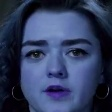

In [31]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img

In [32]:
img = np.transpose(img,(2,0,1)).astype(np.float32)
img

array([[[29., 28., 27., ...,  5.,  9., 10.],
        [29., 28., 27., ...,  9., 13., 12.],
        [28., 25., 25., ..., 13., 11., 13.],
        ...,
        [11.,  7.,  4., ...,  2.,  3.,  4.],
        [ 9.,  5.,  3., ...,  1.,  2.,  3.],
        [ 8.,  4.,  4., ...,  1.,  2.,  4.]],

       [[34., 33., 33., ..., 11., 18., 19.],
        [34., 34., 33., ..., 18., 22., 21.],
        [34., 33., 33., ..., 21., 19., 23.],
        ...,
        [12.,  7.,  2., ...,  0.,  0.,  0.],
        [ 9.,  5.,  1., ...,  0.,  1.,  2.],
        [ 8.,  4.,  2., ...,  0.,  1.,  3.]],

       [[33., 32., 32., ..., 16., 22., 23.],
        [33., 33., 32., ..., 22., 26., 25.],
        [33., 32., 33., ..., 28., 26., 30.],
        ...,
        [26., 21., 14., ...,  8., 10., 11.],
        [23., 19., 13., ...,  9., 11., 12.],
        [22., 18., 14., ...,  9., 11., 13.]]], dtype=float32)

In [34]:
img = img/255.0

In [35]:
img = np.expand_dims(img, axis=0)
inputs = session.get_inputs()
outputs = session.run(None, {inputs[0].name: img})
face_embedding = outputs[0]
print(face_embedding)

[[-6.77201748e-01  1.08011413e+00  1.56152368e+00  2.10005140e+00
  -1.00068104e+00 -6.90582573e-01  1.30733716e+00 -9.02433276e-01
   9.57808256e-01 -2.62152463e-01 -1.27027929e+00  4.91492569e-01
   2.26868367e+00 -6.63021028e-01 -2.37899005e-01  4.22355145e-01
  -8.34659457e-01 -3.69140595e-01  1.38984728e+00  1.59440005e+00
   1.71190456e-01 -1.63732910e+00 -4.24270481e-02 -1.70689628e-01
   8.54113579e-01 -1.70008934e+00  7.30682090e-02  3.35429102e-01
  -4.96880651e-01  1.05684829e+00 -5.90017140e-02 -7.63334930e-02
  -8.52151453e-01 -1.09459758e+00  2.02204967e+00 -3.72110510e+00
   2.21422315e-03  2.77466536e-01  9.55106974e-01  1.66053152e+00
   1.54193437e+00 -6.63520455e-01 -4.90406066e-01 -3.40035260e-02
   9.99166608e-01  4.99678075e-01 -5.17398238e-01  9.86672044e-01
   6.75725937e-01 -1.26401603e-01 -3.82636309e-01  4.91031826e-01
  -2.92889595e-01 -1.58538091e+00 -1.31329045e-01  2.54767656e-01
  -1.09029487e-01  1.23942292e+00  9.30824280e-01  1.04304707e+00
   8.52953

<hr>

In [50]:
embedding_model_path = '/content/drive/MyDrive/coconut/buffalo_l/w600k_r50.onnx'
session = ort.InferenceSession(embedding_model_path)
img_path = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train/Arya Stark/256.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img,
                 (112,112))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = np.transpose(img,(2,0,1)).astype(np.float32)
img = img/255.0
img = np.expand_dims(img, axis=0)
inputs = session.get_inputs()
outputs = session.run(None, {inputs[0].name: img})
face_embedding2 = outputs[0]
print(face_embedding2)

[[-0.21430495  1.9383239   0.8936099   0.841963   -0.17193268 -0.48847663
   1.4070114  -1.3056678  -0.06093413 -1.8522606  -0.71030766 -0.23250985
   0.15444066  0.03587017 -0.76171017  0.50604904  0.810891   -0.9016378
  -0.5500976   1.3462675  -0.09657927 -0.39937526 -0.7025087  -1.138328
   1.7181381  -1.1505427   1.5159814   0.92106223  0.6722014   0.2683327
  -0.19878514  0.76016766 -0.716225   -1.5883288   1.1052084  -2.803334
   1.7822852   0.58579594  0.24061242  0.37802488  2.0584376   0.27450407
  -0.76870954  0.6110832  -0.14891386  0.5762191  -0.7983377   0.94092023
   0.76956785  0.63676757 -0.35185272  1.6162319  -2.1091695  -1.055527
  -0.04076266 -0.8392237   0.32353723  1.9599717   0.4644078   1.1885643
   1.1754354  -0.440806   -0.22879031  0.32342643 -0.5949152  -2.2861335
  -0.55520564 -0.10341316  1.0656055   1.555635    1.1740401   0.537902
   0.03794472  1.2518587   0.42738378  1.7160217   2.604584    0.15654536
   0.91707253 -1.6096795  -1.5098426  -0.3505696  

In [42]:
from scipy.spatial.distance import cosine

In [51]:
embedding1 = face_embedding[0]
embedding2 = face_embedding2[0]

In [53]:
1 - cosine(embedding1,embedding1)

1.0

<hr>

In [54]:
def create_embedding(img_path):
    embedding_model_path = '/content/drive/MyDrive/coconut/buffalo_l/w600k_r50.onnx'
    session = ort.InferenceSession(embedding_model_path)
    # img_path = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train/Arya Stark/256.jpg"
    img = cv2.imread(img_path)
    img = cv2.resize(img,
                    (112,112))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.transpose(img,(2,0,1)).astype(np.float32)
    img = img/255.0
    img = np.expand_dims(img, axis=0)
    inputs = session.get_inputs()
    outputs = session.run(None, {inputs[0].name: img})
    face_embedding2 = outputs[0]
    # print(face_embedding2)
    return face_embedding2

In [82]:
img1 = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train/Arya Stark/324.jpg"
img2 = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train/Arya Stark/417.jpg"
img3 = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train/Arya Stark/620.jpg"
img4 = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train/Arya Stark/94.jpg"

img5 = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train/Bran Stark/253.jpg"
img6 = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train/Brienne of Tarth/382.jpg"
img7 = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train/Daenerys Targaryen/110.jpg"
img8 = "/content/drive/MyDrive/coconut/Face-Recognition-with-InsightFace/datasets/train/Jorah Mormont/120.jpg"

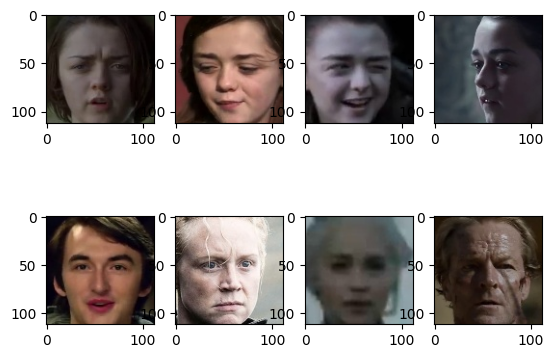

In [87]:
plt.subplot(241)
plt.imshow(plt.imread(img1))
plt.subplot(242)
plt.imshow(plt.imread(img2))
plt.subplot(243)
plt.imshow(plt.imread(img3))
plt.subplot(244)
plt.imshow(plt.imread(img4))

plt.subplot(245)
plt.imshow(plt.imread(img5))
plt.subplot(246)
plt.imshow(plt.imread(img6))
plt.subplot(247)
plt.imshow(plt.imread(img7))
plt.subplot(248)
plt.imshow(plt.imread(img8))

plt.show()

In [88]:
arya1 = create_embedding(img1)
arya2 = create_embedding(img2)
arya3 = create_embedding(img3)
arya4 = create_embedding(img4)

brand    = create_embedding(img1)
brienne  = create_embedding(img2)
deanerys = create_embedding(img3)
johra    = create_embedding(img4)

In [89]:
embedding1 = arya1[0]
embedding2 = arya2[0]
embedding3 = arya3[0]
embedding4 = arya4[0]

embedding5 = brand[0]
embedding6 = brienne[0]
embedding7 = deanerys[0]
embedding8 = johra[0]

In [107]:
similaryty = 1 - cosine(embedding8,embedding8)
if similaryty > 0.5:
    print("same :",similaryty)
else:
    print("orther :",similaryty)

same : 1.0


<hr>